# ***Decision Tree***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/sample_data/heart_disease.xlsx'
sheet_name = 'Heart_disease'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the dataframe
print(df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


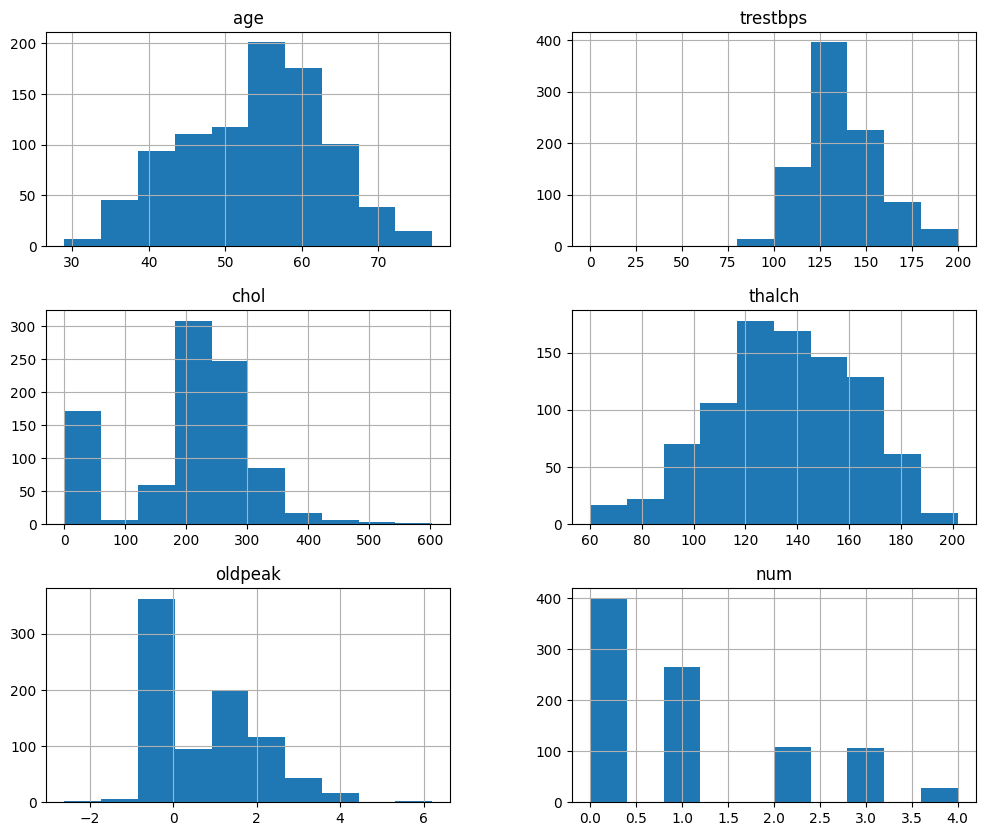

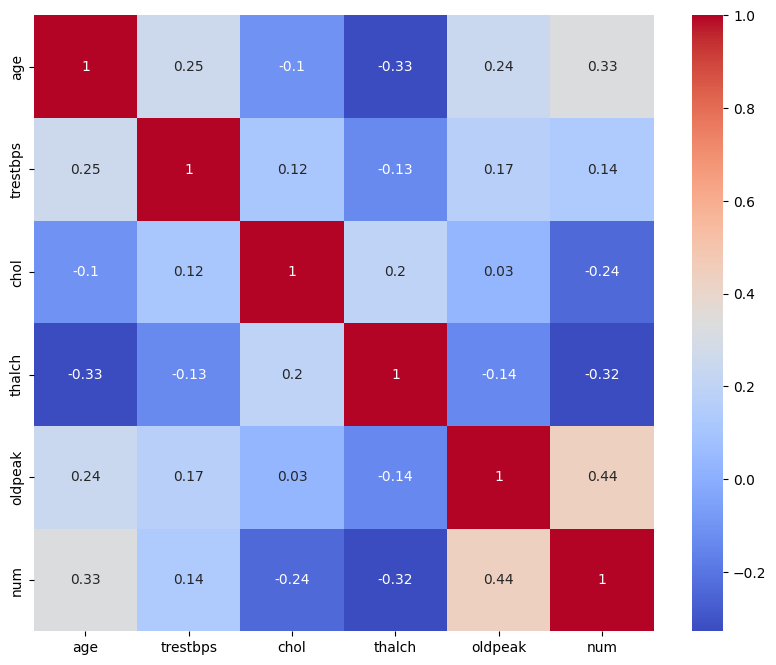

In [4]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print(df.isnull().sum())

# Describe the dataset
print(df.describe())

# Visualize the distribution of features
df.hist(figsize=(12, 10))
plt.show()

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [10]:
# Split the dataset into training and testing sets
X = df.drop(columns=['sex'])  # Assuming 'age' is the label column
y = df['sex']

# Convert the target variable 'sex' to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Convert all non-numerical values to 0 in the features
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce').fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion='squared_error')

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model performance (Use metrics suitable for regression)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.34065934065934067
R-squared: -0.8037084398976986


In [11]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.6593406593406593
Precision: 0.7534246575342466
Recall: 0.8088235294117647
F1 Score: 0.7801418439716312
ROC AUC Score: 0.5131074168797954


In [13]:
# Hyperparameter Tuning
from sklearn.tree import DecisionTreeClassifier # Importing DecisionTreeClassifier
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [14]:
# Best parameters and model evaluation
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.6703296703296703


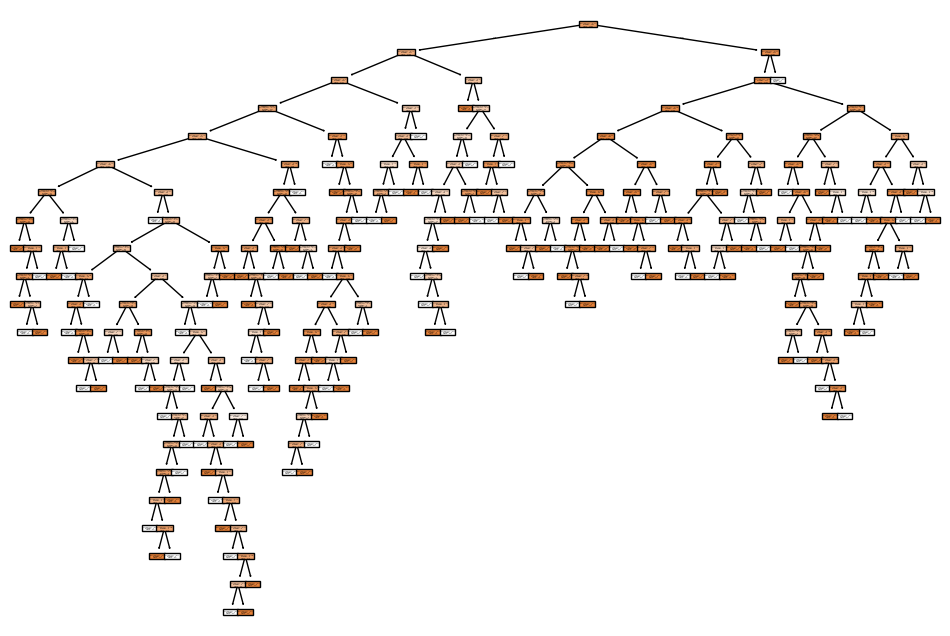

In [15]:
# Visualize the Decision Tree (May need adjustments for regression)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, filled=True) # Remove class_names for regression
plt.show()